<a href="https://colab.research.google.com/github/IlyaZutler/Project-OpenWeather/blob/main/colab_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/weather_lib.py
import weather_lib as wlib


--2024-06-10 15:36:52--  https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/weather_lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3246 (3.2K) [text/plain]
Saving to: ‘weather_lib.py.7’

weather_lib.py.7    100%[===================>]   3.17K  --.-KB/s    in 0s      

2024-06-10 15:36:52 (44.0 MB/s) - ‘weather_lib.py.7’ saved [3246/3246]



A weather forecaster is like a sapper - 
he makes mistake only once,
but every day

Enter the city (if necessary, add country code separated by comma): Roma, IT

Time in the Roma, IT: 18:22  10.06.2024
Sunrise:             05:34
Sunset:              20:44
Temperature Now:     from 22.7  to 24.1 °C
Weather:             broken clouds
Humidity:            52 %


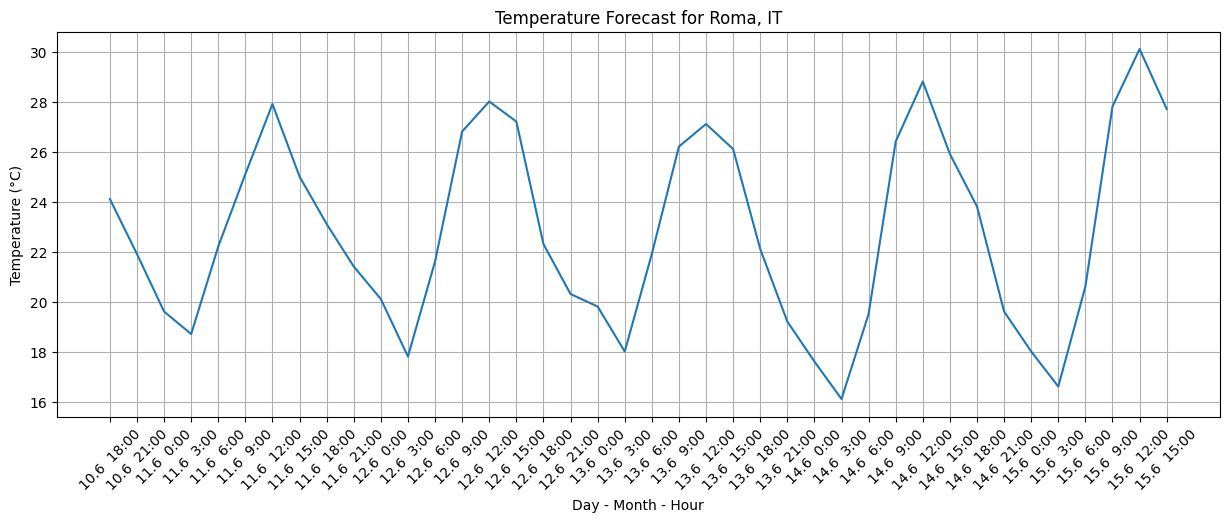

                     temp_min °C  temp_max °C  humidity %           weather
day_time                                                                   
10.06.2024    18:00         22.7         24.1          52     broken clouds
10.06.2024    21:00         20.5         21.9          67  scattered clouds
11.06.2024    00:00         19.6         19.6          79        few clouds
11.06.2024    03:00         18.7         18.7          81     broken clouds
11.06.2024    06:00         22.2         22.2          61  scattered clouds
11.06.2024    09:00         25.1         25.1          45   overcast clouds
11.06.2024    12:00         27.9         27.9          37   overcast clouds
11.06.2024    15:00         25.0         25.0          44   overcast clouds
11.06.2024    18:00         23.1         23.1          49   overcast clouds
11.06.2024    21:00         21.4         21.4          64   overcast clouds
12.06.2024    00:00         20.1         20.1          61   overcast clouds
12.06.2024  

In [4]:
url = "https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/param_defolt.json"

defolt_parametrs = wlib.get_defolt_parametrs(url)
city = defolt_parametrs['params']['city']
units = defolt_parametrs['params']['units']
key = defolt_parametrs['params']['key']
hi = defolt_parametrs['welcome']['hi']

request = True
while request:

    print(hi)
    city = input('Enter the city (if necessary, add country code separated by comma): ')
    print()

    data = wlib.get_weather(city, units, key)
    if not data:
        print('Something is going wrong......')
    else:
        dt_txt_datetime, temp, temp_min, temp_max, humidity, description = wlib.data_to_lists(data)
        sunrise, sunset = wlib.get_sun_time(data)
        local_time = wlib.time_in_the_city(data)

        print(f'Time in the {city}:'.ljust(20),  f'{local_time.strftime("%H:%M  %d.%m.%Y")}')
        print('Sunrise:'.ljust(20),  f'{sunrise.strftime("%H:%M")}')
        print('Sunset:'.ljust(20),  f'{sunset.strftime("%H:%M")}')
        print(f'Temperature Now:'.ljust(20),  f'from {temp_min[0]:.1f}  to {temp_max[0]:.1f} °C')
        print('Weather:'.ljust(20),  f'{description[0]}')
        print('Humidity:'.ljust(20),  f'{humidity[0]} %')

        wlib.plot_weather(dt_txt_datetime, temp, city)
        print(wlib.table_of_data(dt_txt_datetime, temp_min, temp_max, humidity, description))

    # weather chart covers the input field
    # want_add = input("Enter 1 to Continue or 0 to Exit: ")
    # request = (want_add == '1')
    request = False

